# **Real** **Estate** **Price** **Estimation**: **A** **Machine** **Learning** **Approach**


**Predicting** **House** **Price**

**Name** : **Toncy** **vj**

**Organization** : **Entri** **Elevate**

# Overview

The House Price Prediction Model project aims to harness the power of machine learning to accurately forecast real estate prices. By analyzing a comprehensive dataset that includes various features such as location, size, number of rooms, and other relevant factors, this project seeks to develop a predictive model that can provide valuable insights for potential homebuyers, real estate agents, and investors.

The project will involve several key stages, including data collection, preprocessing, exploratory data analysis (EDA), model selection, training, evaluation, and deployment. Various machine learning algorithms will be explored and compared to identify the most effective approach for predicting house prices. The final model will be evaluated based on performance metrics such as MSE, RMSE, MAE, and R² to ensure high accuracy and reliability.



# Objective


The objective of this dataset is to predict property sale prices in New York City by building a regression model using various real estate-related features. These features include location, square footage, building type, year built, and other property characteristics.

# Data Description

Source : https://data.world/dataquest/nyc-property-sales-data

Here's a detailed description of the features used in this price prediction project:


# Borough:

Description: The borough where the property is located.
# Neighborhood:

Description: The specific neighborhood within the borough.
# Building Class Category:

Description: The category of the building class (e.g., residential, commercial).
# Tax Class at Present:

Description: The current tax classification of the property.
# Block:

Description: The block number where the property is located.
# Lot:

Description: The lot number within the block.
# Building Class at Present:

Description: The current building class designation.
# Address:

Description: The address of the property.
# Residential Units:

Description: The number of residential units in the property.
# Commercial Units:

Description: The number of commercial units in the property.
# Total Units:

Description: The total number of units (residential + commercial) in the property.
# Year Built:

Description: The year the property was built.
# Gross Square Feet:

Description: The total gross square footage of the property.
# Land Square Feet:

Description: The total land square footage of the property.
# Sale Price:

Description: The sale price of the property.
These features provide a comprehensive view of the properties, allowing the model to learn and predict the sale prices effectively.

# **importing** **libraies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Load** **the** **dataset**

In [ ]:
df=pd.read_csv("/content/NYC_property_sales.csv")

# **first** **few** **rows**

In [ ]:
df.head()

borough neighborhood  building_class_category tax_class_at_present  block  \
0   Bronx     Bathgate  01 One Family Dwellings                    1   3030   
1   Bronx     Bathgate  01 One Family Dwellings                    1   3030   
2   Bronx     Bathgate  01 One Family Dwellings                    1   3039   
3   Bronx     Bathgate  01 One Family Dwellings                    1   3043   
4   Bronx     Bathgate  01 One Family Dwellings                    1   3046   

   lot building_class_at_present               address  residential_units  \
0   62                        A1      4463 Park Avenue                  1   
1   70                        A1      4445 Park Avenue                  1   
2   63                        A1        469 E 185th St                  1   
3   55                        A1  1948 Bathgate Avenue                  1   
4   35                        A1  2083 Bathgate Avenue                  1   

   commercial_units  total_units  land_square_feet  gross_square_feet  \
0                 0            1              1578               1470   
1                 0            1              1694               1497   
2                 0            1              1650               1296   
3                 0            1              2356               2047   
4                 0            1              2050               1560   

   year_built  tax_class_at_time_of_sale building_class_at_time_of_sale  \
0        1899                          1                             A1   
1        1899                          1                             A1   
2        1910                          1                             A1   
3        1901                          1                             A1   
4        1899                          1                             A1   

   sale_price   sale_date  
0      455000  28-11-2018  
1      388500  23-07-2019  
2      419000  20-12-2018  
3      470000  08-03-2019  
4      445000  17-12-2018

# **Last** **few** **rows** **of** **the** **data**

In [ ]:
df.tail()

borough neighborhood  building_class_category  \
38172  Staten Island      Woodrow  02 Two Family Dwellings   
38173  Staten Island      Woodrow  02 Two Family Dwellings   
38174  Staten Island      Woodrow  02 Two Family Dwellings   
38175  Staten Island      Woodrow  02 Two Family Dwellings   
38176  Staten Island      Woodrow  02 Two Family Dwellings   

      tax_class_at_present  block  lot building_class_at_present  \
38172                    1   7349   35                        B9   
38173                    1   7351   22                        B2   
38174                    1   7355   68                        B9   
38175                    1   7355   85                        B9   
38176                    1   7355   95                        B9   

                   address  residential_units  commercial_units  total_units  \
38172        33 Quail Lane                  2                 0            2   
38173    22 Herrick Avenue                  2                 0            2   
38174     62 Ambassador La                  2                 0            2   
38175  104 Ambassador Lane                  2                 0            2   
38176  115 Ambassador Lane                  2                 0            2   

       land_square_feet  gross_square_feet  year_built  \
38172              2255               2377        1998   
38173              4000               2400        2000   
38174              2340               2160        2001   
38175              2730               2565        2001   
38176              8846               1710        2001   

       tax_class_at_time_of_sale building_class_at_time_of_sale  sale_price  \
38172                          1                             B9      640000   
38173                          1                             B2      917000   
38174                          1                             B9      610000   
38175                          1                             B9      625000   
38176                          1                             B9      637500   

        sale_date  
38172  08-03-2019  
38173  01-03-2019  
38174  06-08-2019  
38175  30-07-2019  
38176  20-08-2019

#  **Display the shape of the dataset**

In [ ]:

print(f"Dataset Size: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset Size: 38177 rows, 18 columns


# **data** **types**

In [ ]:
df.dtypes

borough                           object
neighborhood                      object
building_class_category           object
tax_class_at_present              object
block                              int64
lot                                int64
building_class_at_present         object
address                           object
residential_units                  int64
commercial_units                   int64
total_units                        int64
land_square_feet                   int64
gross_square_feet                  int64
year_built                         int64
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale    object
sale_price                         int64
sale_date                         object
dtype: object

# **columns of the dataframe**

In [ ]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

# **categorical** **columns**

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

In [ ]:
print(categorical_cols)

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'building_class_at_present', 'address',
       'building_class_at_time_of_sale', 'sale_date'],
      dtype='object')


**Numerical columns**

In [ ]:
numerical_cols = df.select_dtypes(include="number").columns

In [ ]:
print(numerical_cols)

Index(['block', 'lot', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'sale_price'],
      dtype='object')


**display the index range**

In [ ]:
df.index

RangeIndex(start=0, stop=38177, step=1)

**Statistics for Numerical Variables**

In [ ]:
df.describe().T

count          mean           std      min  \
block                      38177.0  4.675074e+03  3.823556e+03      1.0   
lot                        38177.0  4.647547e+02  7.060721e+02      1.0   
residential_units          38177.0  1.835032e+00  1.188106e+01      0.0   
commercial_units           38177.0  2.196872e-01  4.519257e+00      0.0   
total_units                38177.0  2.054719e+00  1.283126e+01      0.0   
land_square_feet           38177.0  2.637900e+03  1.179990e+04      0.0   
gross_square_feet          38177.0  3.543144e+03  2.250052e+04      1.0   
year_built                 38177.0  1.821801e+03  4.910531e+02      0.0   
tax_class_at_time_of_sale  38177.0  1.514577e+00  8.136600e-01      1.0   
sale_price                 38177.0  2.431342e+06  1.863026e+07  10040.0   

                                25%       50%        75%           max  
block                        1414.0    3916.0     6823.0  1.632300e+04  
lot                            27.0      61.0     1032.0  9.109000e+03  
residential_units               0.0       1.0        2.0  1.327000e+03  
commercial_units                0.0       0.0        0.0  5.700000e+02  
total_units                     0.0       1.0        2.0  1.348000e+03  
land_square_feet                0.0    2000.0     3000.0  1.217249e+06  
gross_square_feet            1083.0    1552.0     2334.0  1.741458e+06  
year_built                   1920.0    1940.0     1986.0  2.020000e+03  
tax_class_at_time_of_sale       1.0       1.0        2.0  4.000000e+00  
sale_price                 525000.0  760000.0  1280000.0  2.155000e+09

**Statistics for categorical Variables**

In [ ]:
df.describe(include="object").T

count unique                      top   freq
borough                         38177      5                   Queens  11955
neighborhood                    38177    253           Flushing-North   1110
building_class_category         38177     37  01 One Family Dwellings  11755
tax_class_at_present            38177      8                        1  22711
building_class_at_present       38177    137                       R4   8138
address                         38177  36943   142-20 Franklin Avenue     30
building_class_at_time_of_sale  38177    137                       R4   8096
sale_date                       38177    318               28-06-2019    359

**Check for Inconsistent Data Entries**

**convert the sale_date column to datetime format**

In [ ]:
df['sale_date_time'] = pd.to_datetime(df['sale_date'], errors='coerce', dayfirst=True)


 **Extract** **the** **year**

In [ ]:

df['sale_year'] = df['sale_date_time'].dt.year

In [ ]:
df['age_after_sale'] = 2024 - df['sale_year']
df.drop(columns=['sale_date'], inplace=True)
df.drop(columns=['sale_year'], inplace=True)
df.drop(columns=['sale_date_time'], inplace=True)

**Identify invalid or inconsistent categories**

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"\n Unique values in '{col}':")
    print(df[col].value_counts(dropna=False))





 Unique values in 'borough':
borough
Queens           11955
Brooklyn         10888
Manhattan         6572
Staten Island     4837
Bronx             3925
Name: count, dtype: int64

 Unique values in 'neighborhood':
neighborhood
Flushing-North           1110
Bedford Stuyvesant        751
East New York             589
Canarsie                  485
Borough Park              480
                         ... 
Rossville-Port Mobil        3
Bloomfield                  2
Morningside Heights         2
Bronx Park                  1
Staten Island-Unknown       1
Name: count, Length: 253, dtype: int64

 Unique values in 'building_class_category':
building_class_category
01 One Family Dwellings                       11755
02 Two Family Dwellings                        8797
13 Condos - Elevator Apartments                8096
03 Three Family Dwellings                      2158
07 Rentals - Walkup Apartments                 1424
04 Tax Class 1 Condos                          1068
15 Condos - 2-10 Unit 

**information of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38177 entries, 0 to 38176
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         38177 non-null  object
 1   neighborhood                    38177 non-null  object
 2   building_class_category         38177 non-null  object
 3   tax_class_at_present            38177 non-null  object
 4   block                           38177 non-null  int64 
 5   lot                             38177 non-null  int64 
 6   building_class_at_present       38177 non-null  object
 7   address                         38177 non-null  object
 8   residential_units               38177 non-null  int64 
 9   commercial_units                38177 non-null  int64 
 10  total_units                     38177 non-null  int64 
 11  land_square_feet                38177 non-null  int64 
 12  gross_square_feet               38177 non-null

In [ ]:
df.duplicated().any()


np.True_

**calculating sum of how many duplicates present in this dataframe**

In [ ]:
df.duplicated().sum()

np.int64(9)

 **Drops** **all**  **duplicates**

In [ ]:
df = df.drop_duplicates(keep=False)

**removes all rows with missing (NaN) values**

In [ ]:
df=df.dropna()

**Removed Columns with Missing Values**


In [ ]:

df = df.dropna(axis=1, how='all')



**Check for Missing Values by Column**

In [ ]:

print(df.isnull().sum())


borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
age_after_sale                    0
dtype: int64


 **Calculate** **skewness** **for** **all** **numerical** **columns**

In [ ]:

skewness = df.skew(numeric_only=True).sort_values(ascending=False)
print(skewness)


commercial_units             76.092780
land_square_feet             55.173901
residential_units            53.987192
sale_price                   53.828844
total_units                  47.856447
gross_square_feet            32.289644
lot                           2.715220
tax_class_at_time_of_sale     1.865830
age_after_sale                1.721732
block                         0.926734
year_built                   -3.416989
dtype: float64


**Visualize the  Distributions of skewness**

**List of numerical columns with skewness**

# Findings:

**Severe** **positive**-**Skewness**:


commercial_units, land_square_feet, residential_units, sale_price, total_units, and gross_square_feet are heavily right-skewed.
This indicates the presence of extreme values or outliers.
Transformations are necessary to reduce skewness.


**Moderate** **Right**-**Skewness**:


lot, tax_class_at_time_of_sale, and block show moderate right-skewness, which still needs mild transformation.


**Left**-**Skewed** **Column**:

year_built is left-skewed, indicating more recent construction dates are rarer than older ones.


# Transformation  help to  normalize this distribution.

# Log Transformation

 **Apply** **log** **transformation** **to** **highly** **skewed** **columns**

In [ ]:

skewed_cols = ['commercial_units', 'land_square_feet', 'residential_units',
               'sale_price', 'total_units', 'gross_square_feet']

for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])


 **Check** **skewness** **before** **and** **after** **transformation**

In [ ]:

for col in skewed_cols:
    original_skew = df[col].skew()
    transformed_skew = df[f'{col}_log'].skew()
    print(f"{col} - Original Skewness: {original_skew:.4f}, Transformed Skewness: {transformed_skew:.4f}")


commercial_units - Original Skewness: 76.0928, Transformed Skewness: 7.0252
land_square_feet - Original Skewness: 55.1739, Transformed Skewness: -0.7280
residential_units - Original Skewness: 53.9872, Transformed Skewness: 1.5671
sale_price - Original Skewness: 53.8288, Transformed Skewness: 1.0748
total_units - Original Skewness: 47.8564, Transformed Skewness: 1.6131
gross_square_feet - Original Skewness: 32.2896, Transformed Skewness: 0.6478


**Visualize the Transformed Distributions**

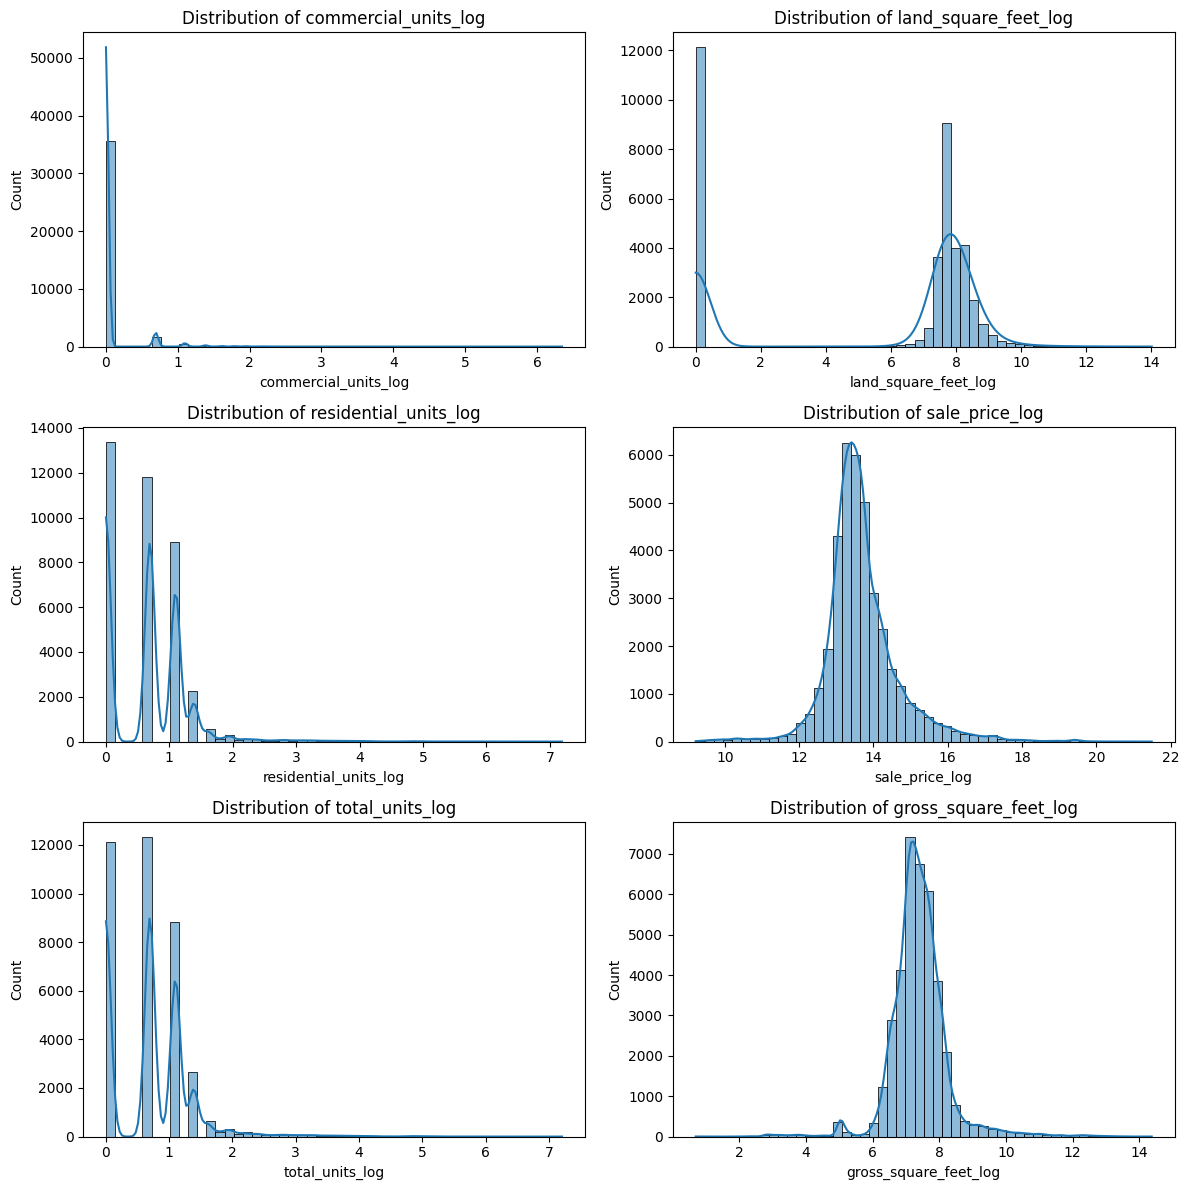

In [ ]:


fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, col in enumerate(['commercial_units_log', 'land_square_feet_log', 'residential_units_log',
                         'sale_price_log', 'total_units_log', 'gross_square_feet_log']):
    row, col_idx = divmod(i, 2)

    sns.histplot(df[col], bins=50, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


**Detecetion of outliers** **using** **boxplot**

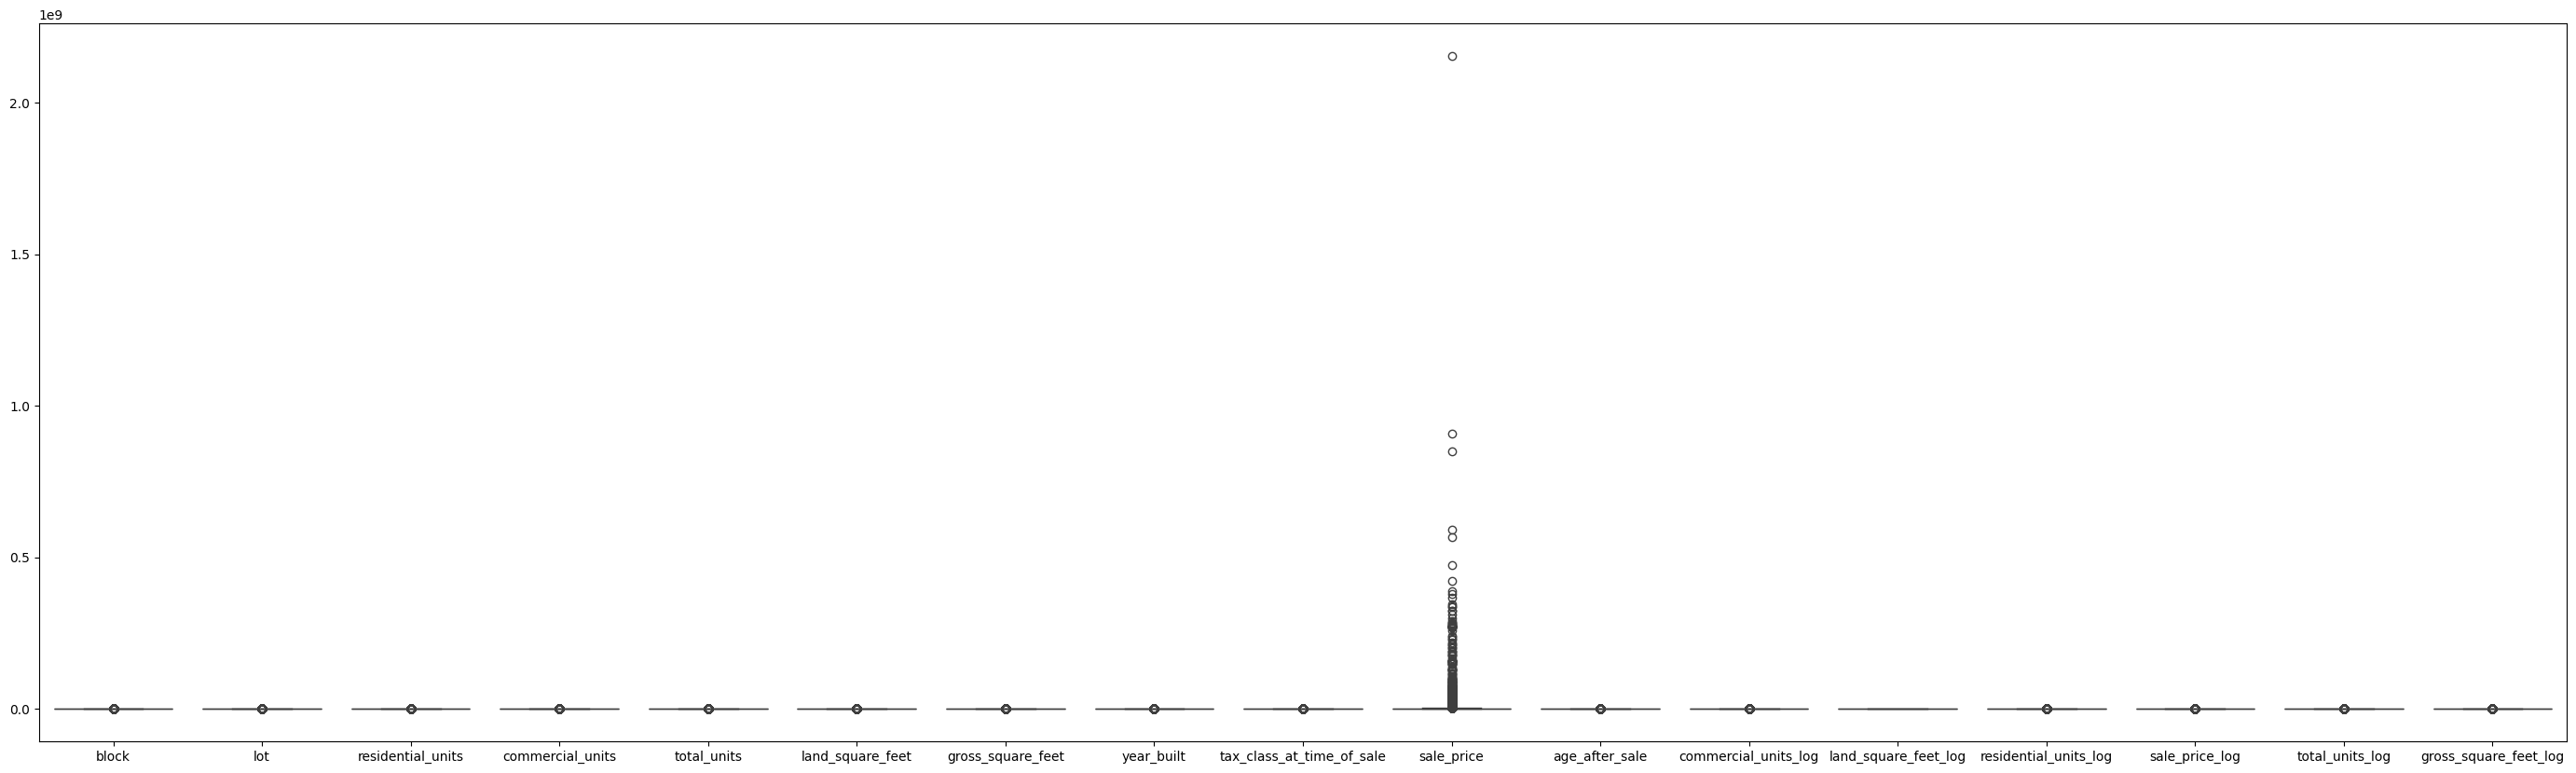

In [ ]:
plt.figure(figsize=(35,10))
sns.boxplot(df)
plt.show()

**boxplot shows that outliers present in the entire columns**

**Outlier treatment function**

**IQR METHOD**

In [ ]:

def treat_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

In [ ]:
columns_to_treat = ['block', 'lot', 'residential_units', 'commercial_units', 'total_units',
                    'land_square_feet', 'gross_square_feet', 'year_built',
                    'tax_class_at_time_of_sale', 'sale_price']
for column in columns_to_treat:
    if column in df.columns:
        df = treat_outliers(df, column)


**Display the treated DataFrame**

In [ ]:

df.head()

borough neighborhood  building_class_category tax_class_at_present   block  \
0   Bronx     Bathgate  01 One Family Dwellings                    1  3030.0   
1   Bronx     Bathgate  01 One Family Dwellings                    1  3030.0   
2   Bronx     Bathgate  01 One Family Dwellings                    1  3039.0   
3   Bronx     Bathgate  01 One Family Dwellings                    1  3043.0   
4   Bronx     Bathgate  01 One Family Dwellings                    1  3046.0   

    lot building_class_at_present               address  residential_units  \
0  62.0                        A1      4463 Park Avenue                1.0   
1  70.0                        A1      4445 Park Avenue                1.0   
2  63.0                        A1        469 E 185th St                1.0   
3  55.0                        A1  1948 Bathgate Avenue                1.0   
4  35.0                        A1  2083 Bathgate Avenue                1.0   

   commercial_units  ...  tax_class_at_time_of_sale  \
0               0.0  ...                        1.0   
1               0.0  ...                        1.0   
2               0.0  ...                        1.0   
3               0.0  ...                        1.0   
4               0.0  ...                        1.0   

   building_class_at_time_of_sale  sale_price  age_after_sale  \
0                              A1    455000.0               6   
1                              A1    388500.0               5   
2                              A1    419000.0               6   
3                              A1    470000.0               5   
4                              A1    445000.0               6   

   commercial_units_log land_square_feet_log  residential_units_log  \
0                   0.0             7.364547               0.693147   
1                   0.0             7.435438               0.693147   
2                   0.0             7.409136               0.693147   
3                   0.0             7.765145               0.693147   
4                   0.0             7.626083               0.693147   

   sale_price_log  total_units_log  gross_square_feet_log  
0       13.028055         0.693147               7.293698  
1       12.870051         0.693147               7.311886  
2       12.945629         0.693147               7.167809  
3       13.060490         0.693147               7.624619  
4       13.005832         0.693147               7.353082  

[5 rows x 24 columns]


 **Visualizing**  **after** **outlier** **treatment**

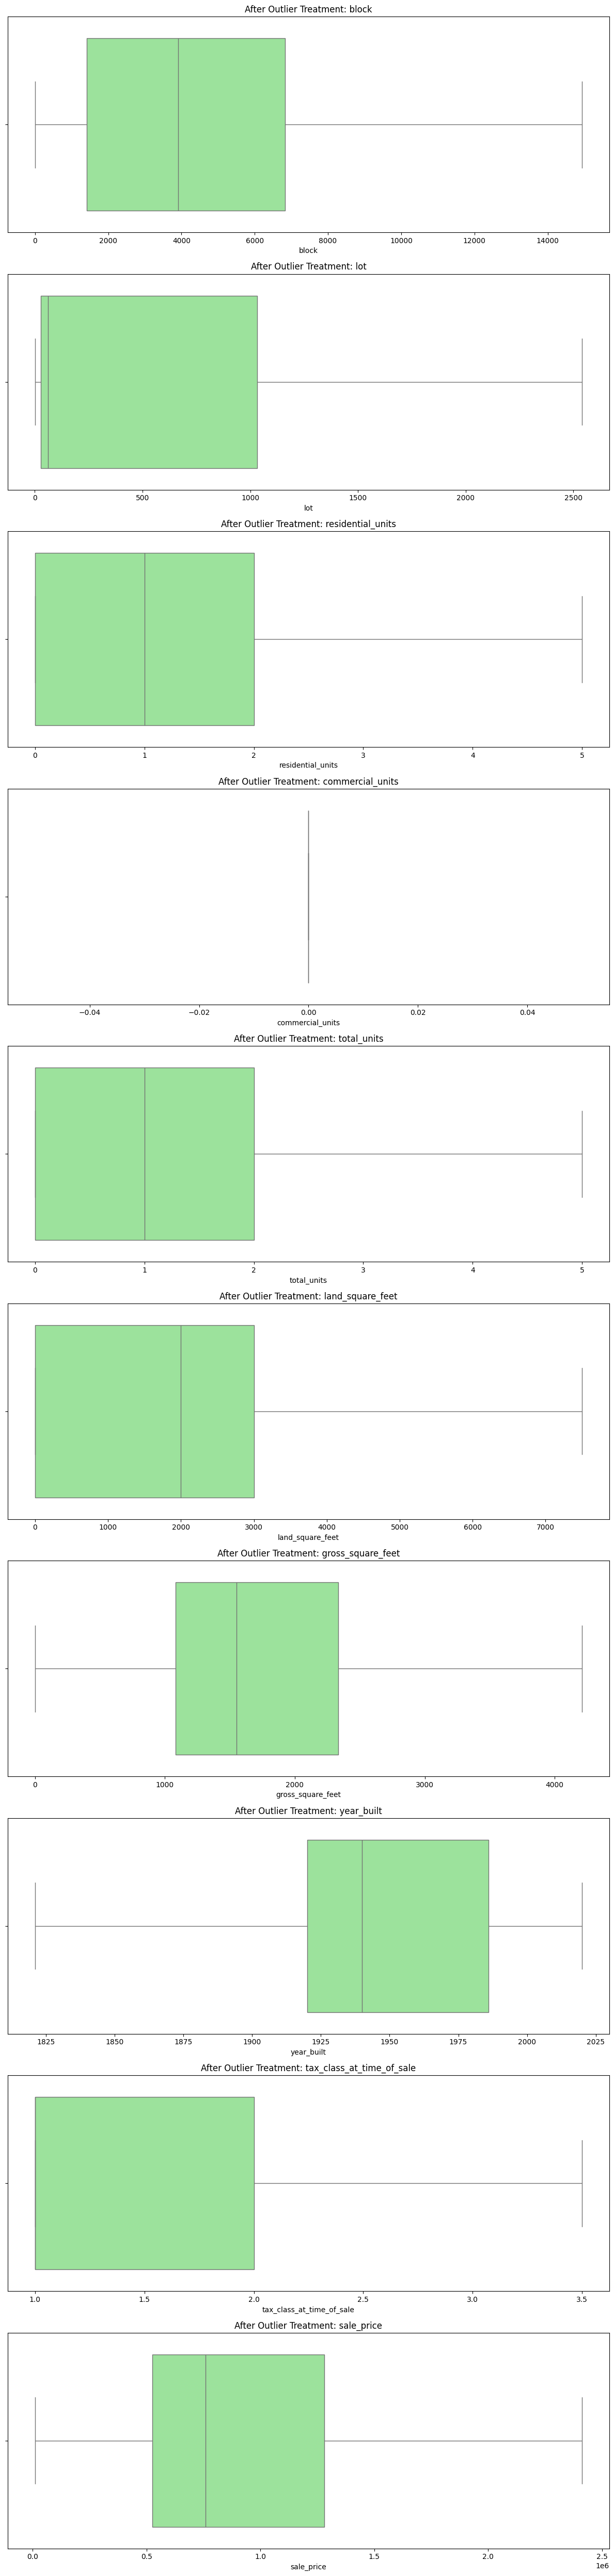

In [ ]:


fig, axes = plt.subplots(len(columns_to_treat), 1, figsize=(12, 5 * len(columns_to_treat)))

for i, column in enumerate(columns_to_treat):
    if column in df.columns:
        sns.boxplot(x=df[column], ax=axes[i], color='lightgreen')
        axes[i].set_title(f'After Outlier Treatment: {column}')

plt.tight_layout()
plt.show()


**all outliers removed in  numerical columns**

**Saving the cleaned DataFrame to a new CSV file**

In [ ]:

cleaned_file_path = "cleaned_data.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully as '{cleaned_file_path}'")


Cleaned dataset saved successfully as 'cleaned_data.csv'


# **EDA**

# **countplot** **of** **dataframe**

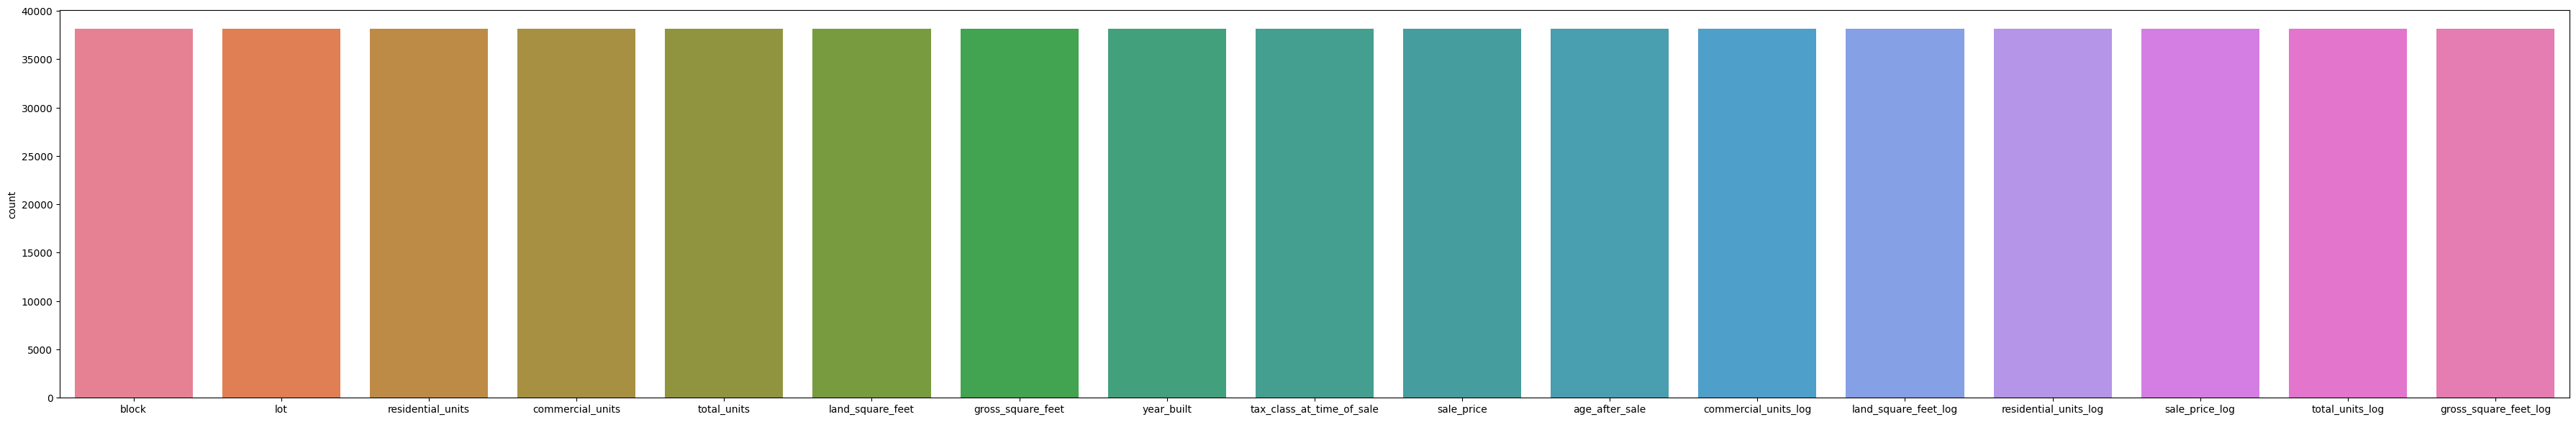

In [ ]:
plt.figure(figsize=(45,7))
sns.countplot(df)
plt.show()

 **Borough** **Distribution** **Plot**

<Axes: xlabel='count', ylabel='borough'>

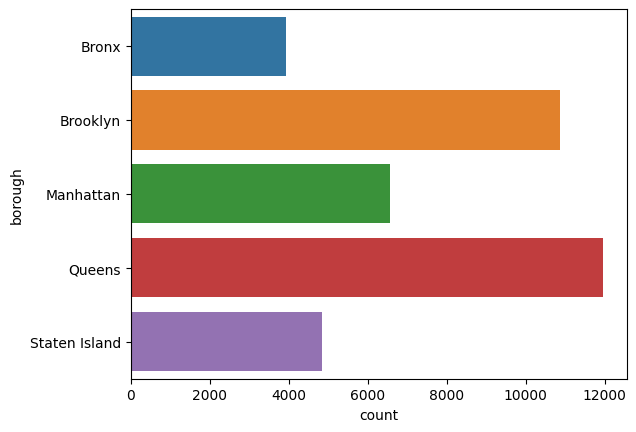

In [ ]:
sns.countplot(y='borough', data=df, hue='borough', legend=False)

**Queens has the highest number of property sales, followed by Brooklyn, indicating these boroughs have more real estate transactions.**

**Manhattan and Staten Island have moderate sales volumes, suggesting lower transaction activity compared to Brooklyn and Queens.**

**Bronx has the lowest number of property sales, indicating less real estate activity in that borough**

**countplot to visualize the frequency of different categories in the 'building_class_category'**

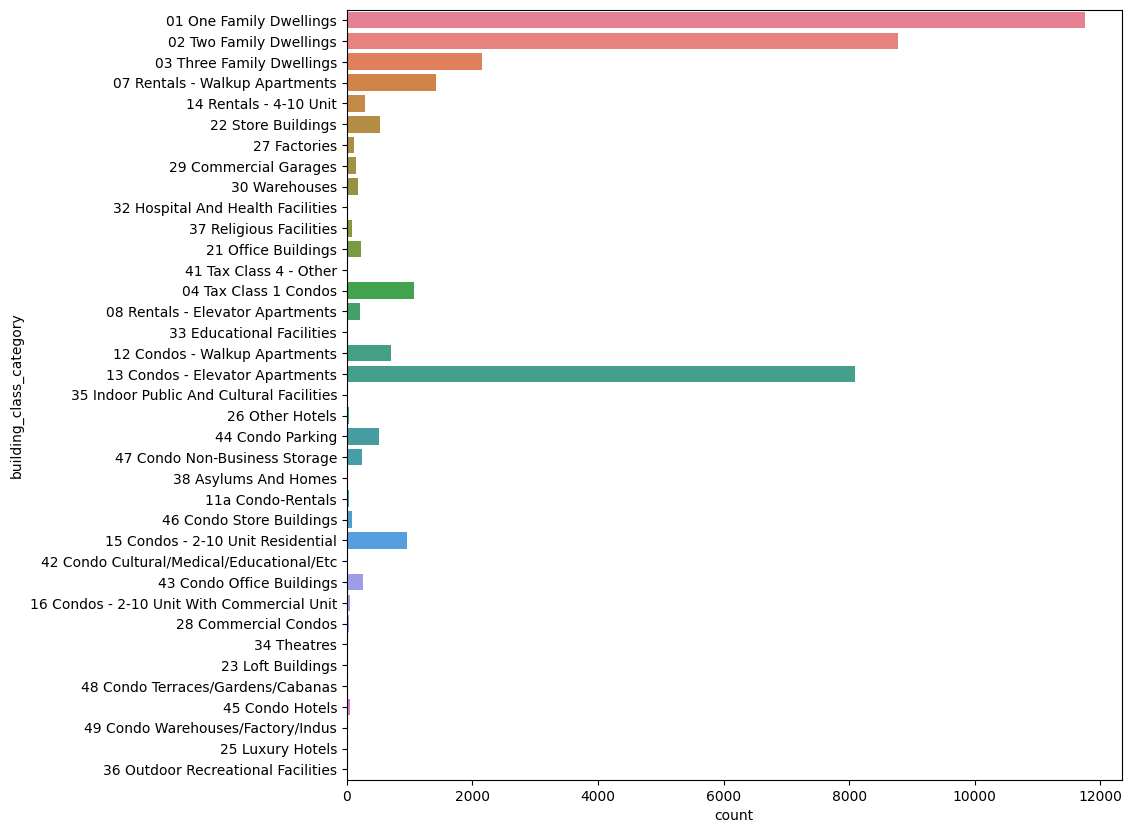

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='building_class_category', data=df, hue='building_class_category', legend=False)
plt.show()


**Here are some insights based on the chart**


**One Family Dwellings have the highest number of sales, indicating **a **strong market for single-family homes**

**Two Family Dwellings also show a significant number of sales, suggesting a demand for multi-family residential properties**

**Walk-up Apartments and Elevator Apartments have moderate sales, reflecting the urban residential market’s activity**.

**Other categories like Mixed Residential & Commercial Buildings have lower sales compared to residential properties**

# **Calculate correlation matrix**

In [ ]:

numeric_data = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_data.corr()

correlation_matrix

block       lot  residential_units  \
block                      1.000000 -0.363898           0.136190   
lot                       -0.363898  1.000000          -0.625902   
residential_units          0.136190 -0.625902           1.000000   
commercial_units                NaN       NaN                NaN   
total_units                0.114461 -0.649967           0.928780   
land_square_feet           0.329599 -0.684540           0.447435   
gross_square_feet         -0.043964 -0.422779           0.593912   
year_built                -0.001815  0.079409          -0.125511   
tax_class_at_time_of_sale -0.349854  0.506242          -0.364756   
sale_price                -0.391147  0.164336           0.038052   
commercial_units_log      -0.071796 -0.148462           0.042243   
land_square_feet_log       0.403897 -0.916554           0.652683   
residential_units_log      0.186804 -0.669762           0.952407   
sale_price_log            -0.323584  0.091620           0.054316   
total_units_log            0.161789 -0.696936           0.886049   
gross_square_feet_log     -0.007478 -0.424841           0.519308   

                           commercial_units  total_units  land_square_feet  \
block                                   NaN     0.114461          0.329599   
lot                                     NaN    -0.649967         -0.684540   
residential_units                       NaN     0.928780          0.447435   
commercial_units                        NaN          NaN               NaN   
total_units                             NaN     1.000000          0.520775   
land_square_feet                        NaN     0.520775          1.000000   
gross_square_feet                       NaN     0.693110          0.465365   
year_built                              NaN    -0.133637         -0.046744   
tax_class_at_time_of_sale               NaN    -0.197294         -0.278549   
sale_price                              NaN     0.121841         -0.029461   
commercial_units_log                    NaN     0.368224          0.270260   
land_square_feet_log                    NaN     0.687371          0.816254   
residential_units_log                   NaN     0.877987          0.530936   
sale_price_log                          NaN     0.149523          0.045896   
total_units_log                         NaN     0.946537          0.614863   
gross_square_feet_log                   NaN     0.631614          0.510294   

                           gross_square_feet  year_built  \
block                              -0.043964   -0.001815   
lot                                -0.422779    0.079409   
residential_units                   0.593912   -0.125511   
commercial_units                         NaN         NaN   
total_units                         0.693110   -0.133637   
land_square_feet                    0.465365   -0.046744   
gross_square_feet                   1.000000   -0.069427   
year_built                         -0.069427    1.000000   
tax_class_at_time_of_sale           0.021240    0.044395   
sale_price                          0.466338    0.000573   
commercial_units_log                0.391611   -0.046349   
land_square_feet_log                0.470080   -0.102399   
residential_units_log               0.551918   -0.114657   
sale_price_log                      0.485880    0.018761   
total_units_log                     0.655421   -0.121328   
gross_square_feet_log               0.875133   -0.061839   

                           tax_class_at_time_of_sale  sale_price  \
block                                      -0.349854   -0.391147   
lot                                         0.506242    0.164336   
residential_units                          -0.364756    0.038052   
commercial_units                                 NaN         NaN   
total_units                                -0.197294    0.121841   
land_square_feet                           -0.278549   -0.029461   
gross_square_feet                           0.021

**droping commerical column  the column holds no meaningful information** **and provides zero predictive value**.

In [ ]:

df = df.drop(columns=[
    'commercial_units',
    'commercial_units_log',
    'total_units',
    'total_units_log',
    'gross_square_feet_log',
    'land_square_feet_log'
])

print("\n Remaining columns:", df.columns)



 Remaining columns: Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'residential_units', 'land_square_feet', 'gross_square_feet',
       'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'age_after_sale',
       'residential_units_log', 'sale_price_log'],
      dtype='object')


#  **again calculating matrix after removing commerical_units column**

In [ ]:

numeric_data = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_data.corr()

correlation_matrix

block       lot  residential_units  \
block                      1.000000 -0.363898           0.136190   
lot                       -0.363898  1.000000          -0.625902   
residential_units          0.136190 -0.625902           1.000000   
land_square_feet           0.329599 -0.684540           0.447435   
gross_square_feet         -0.043964 -0.422779           0.593912   
year_built                -0.001815  0.079409          -0.125511   
tax_class_at_time_of_sale -0.349854  0.506242          -0.364756   
sale_price                -0.391147  0.164336           0.038052   
residential_units_log      0.186804 -0.669762           0.952407   
sale_price_log            -0.323584  0.091620           0.054316   

                           land_square_feet  gross_square_feet  year_built  \
block                              0.329599          -0.043964   -0.001815   
lot                               -0.684540          -0.422779    0.079409   
residential_units                  0.447435           0.593912   -0.125511   
land_square_feet                   1.000000           0.465365   -0.046744   
gross_square_feet                  0.465365           1.000000   -0.069427   
year_built                        -0.046744          -0.069427    1.000000   
tax_class_at_time_of_sale         -0.278549           0.021240    0.044395   
sale_price                        -0.029461           0.466338    0.000573   
residential_units_log              0.530936           0.551918   -0.114657   
sale_price_log                     0.045896           0.485880    0.018761   

                           tax_class_at_time_of_sale  sale_price  \
block                                      -0.349854   -0.391147   
lot                                         0.506242    0.164336   
residential_units                          -0.364756    0.038052   
land_square_feet                           -0.278549   -0.029461   
gross_square_feet                           0.021240    0.466338   
year_built                                  0.044395    0.000573   
tax_class_at_time_of_sale                   1.000000    0.400955   
sale_price                                  0.400955    1.000000   
residential_units_log                      -0.426480    0.004033   
sale_price_log                              0.351577    0.897315   

                           residential_units_log  sale_price_log  
block                                   0.186804       -0.323584  
lot                                    -0.669762        0.091620  
residential_units                       0.952407        0.054316  
land_square_feet                        0.530936        0.045896  
gross_square_feet                       0.551918        0.485880  
year_built                             -0.114657        0.018761  
tax_class_at_time_of_sale              -0.426480        0.351577  
sale_price                              0.004033        0.897315  
residential_units_log                   1.000000        0.048023  
sale_price_log                          0.048023        1.000000

# **correlation matrix** **heatmap**

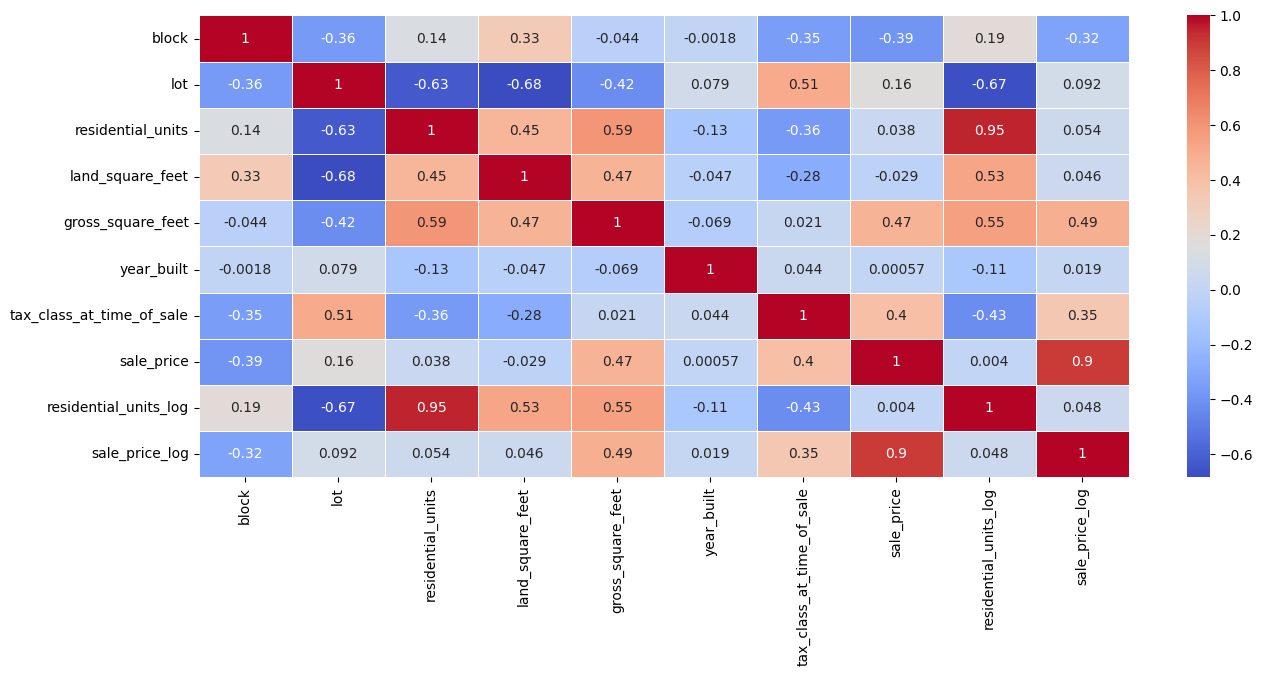

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

#    **pairplot of the dataframe**

<Figure size 1500x700 with 0 Axes>

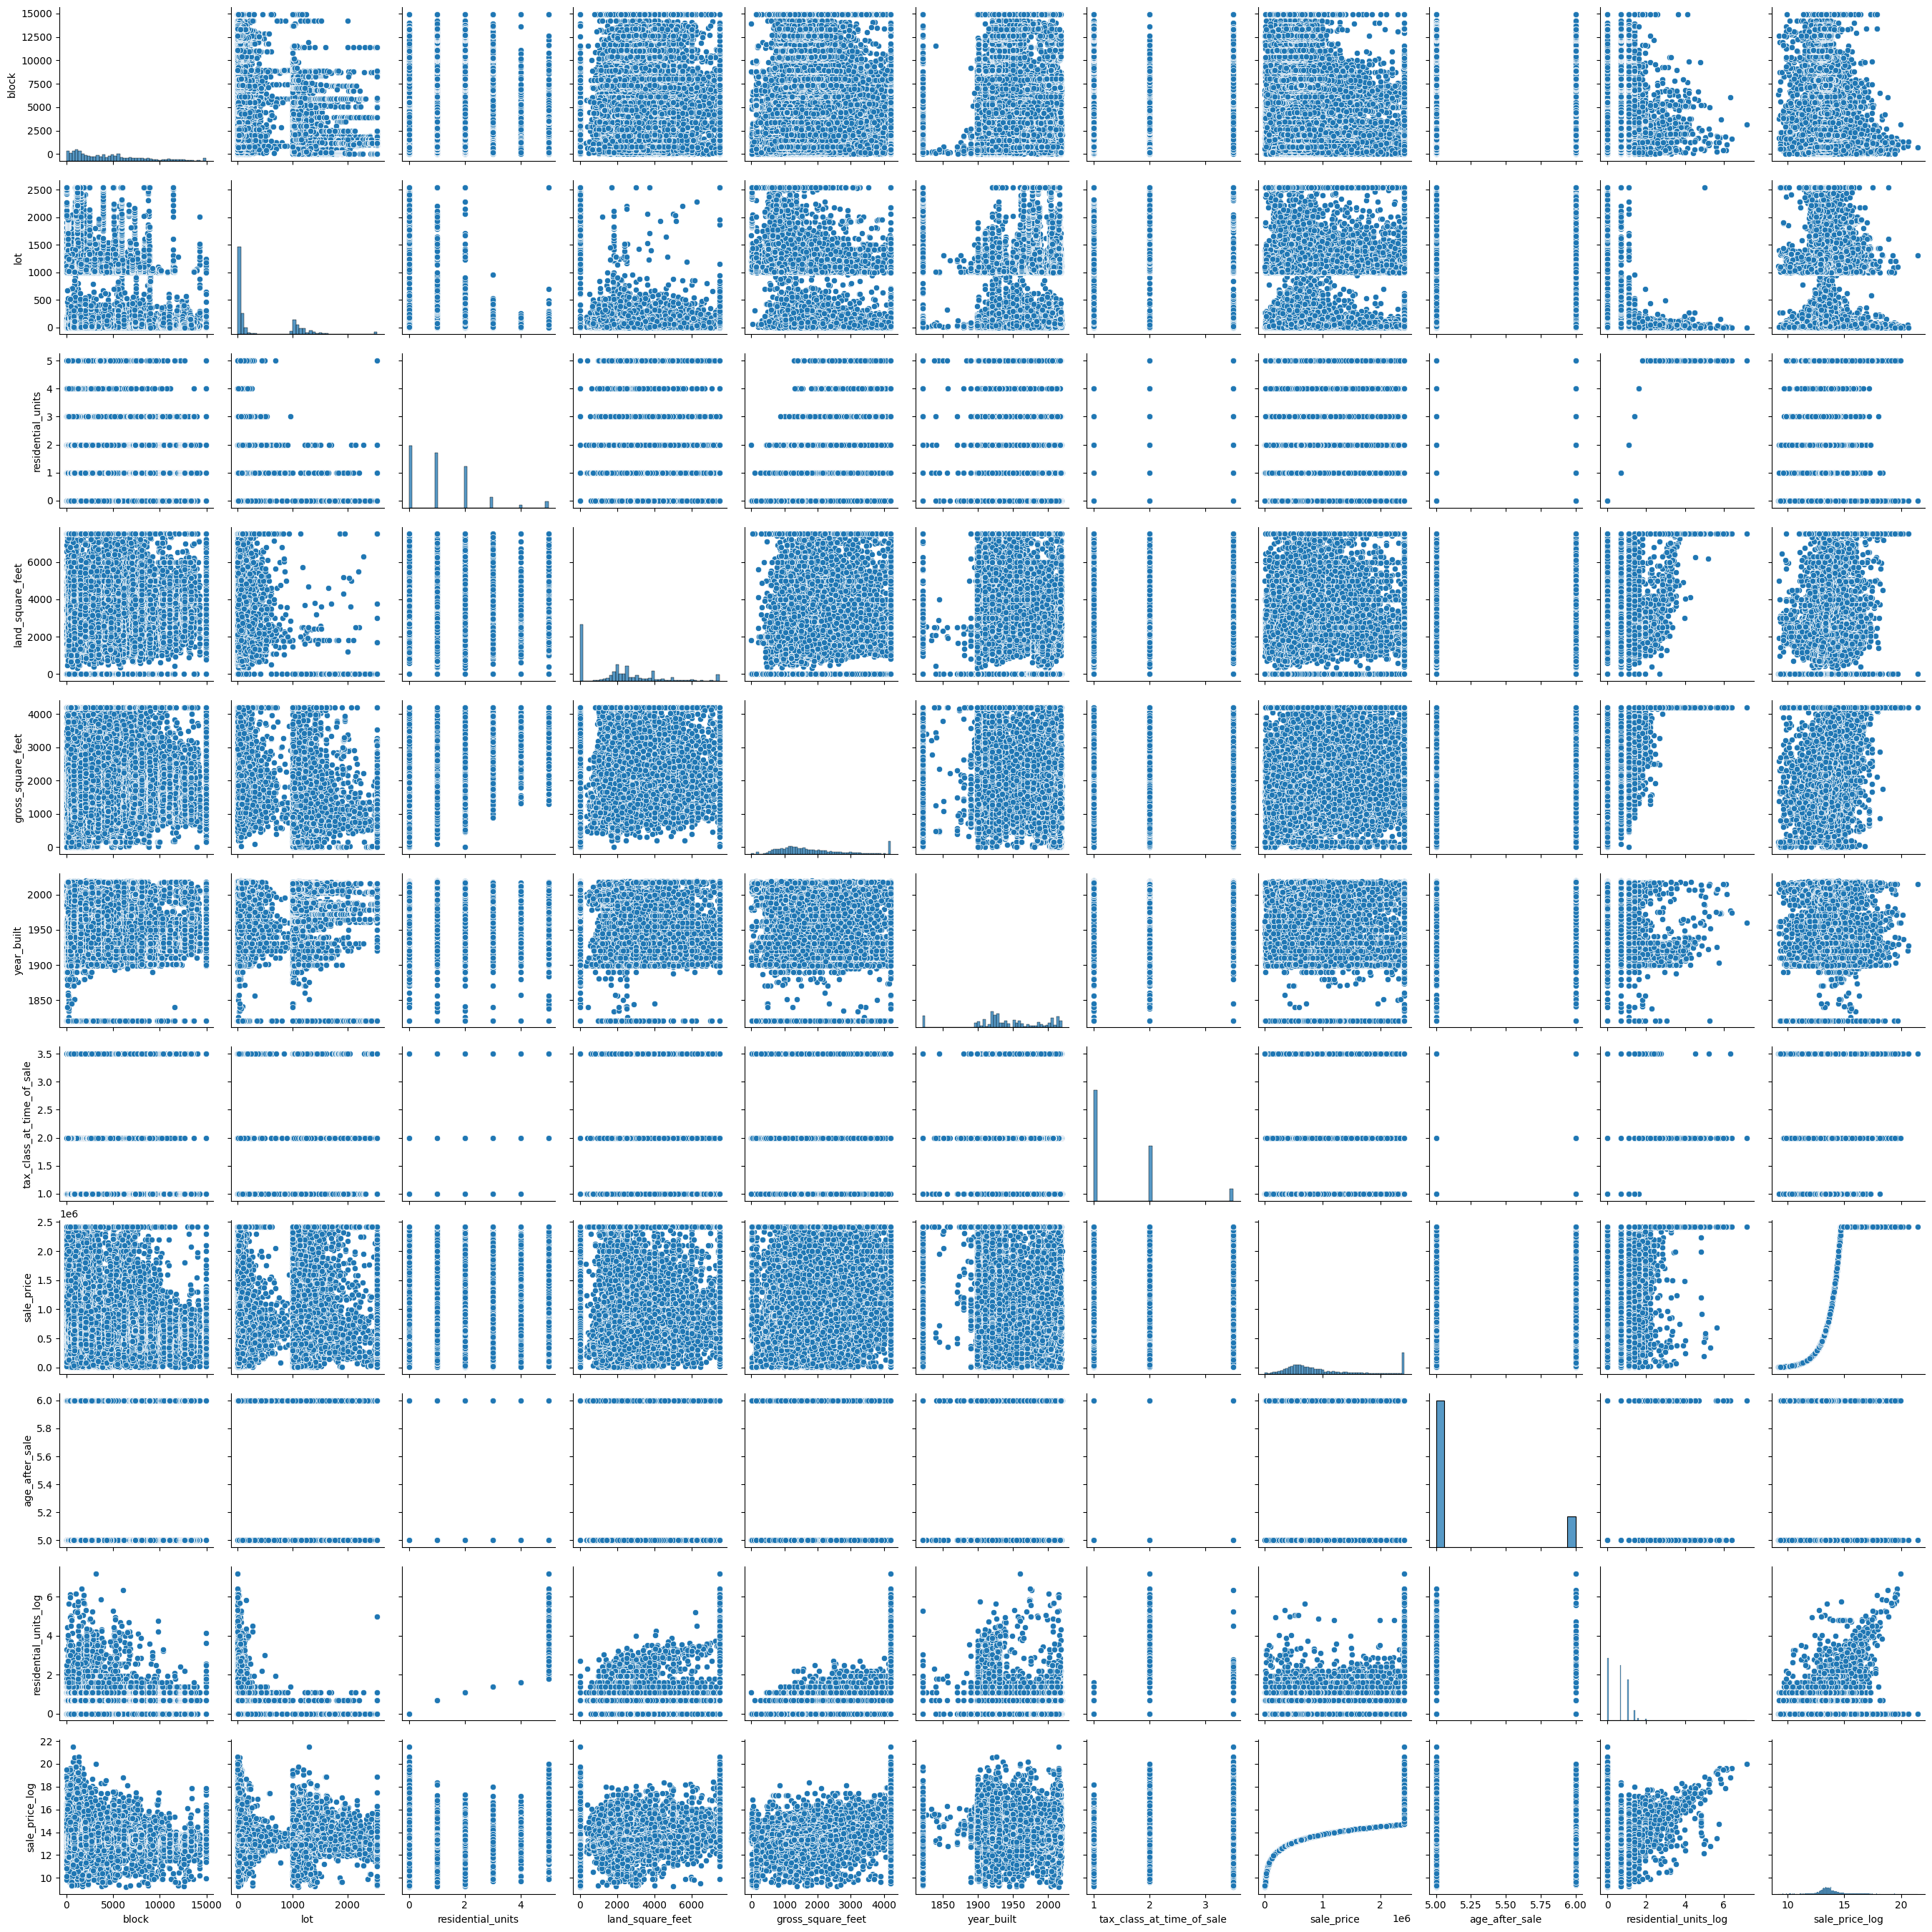

In [ ]:
plt.figure(figsize=(15,7))
sns.pairplot(df)
plt.show()

# **Data Preparation**


# **Identify nominal, ordinal, and high-cardinality columns**

In [ ]:

cat_cols = df.select_dtypes(include='object').columns.tolist()

ordinal_cols = []
nominal_cols = []
high_card_cols = []

for col in cat_cols:
    unique_vals = df[col].nunique()

    if unique_vals < 10:  # Ordinal: Few unique values, likely ordered
        ordinal_cols.append(col)
    elif 10 <= unique_vals <= 50:    # Nominal: Moderate unique values
        nominal_cols.append(col)
    else:                           # High-cardinality: Many unique values
        high_card_cols.append(col)



**Display identified columns**

In [ ]:

print("Ordinal Columns:", ordinal_cols)
print("Nominal Columns:", nominal_cols)
print("High-Cardinality Columns:", high_card_cols)


Ordinal Columns: ['borough', 'tax_class_at_present']
Nominal Columns: ['building_class_category']
High-Cardinality Columns: ['neighborhood', 'building_class_at_present', 'address', 'building_class_at_time_of_sale']


**Ordinal Columns (Label Encoding)**

In [ ]:
from sklearn.preprocessing import LabelEncoder


ordinal_cols = ['borough', 'tax_class_at_present']

for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df[ordinal_cols].head(6)


borough  tax_class_at_present
0        0                     0
1        0                     0
2        0                     0
3        0                     0
4        0                     0
5        0                     0

**OHE of the nominal column**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# List of nominal columns to encode
nom_cols = ['building_class_category']

# Initialize the OneHotEncoder
one_hot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the nominal column
encoded_data = one_hot_enc.fit_transform(df[nom_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_enc.get_feature_names_out(nom_cols))

# Concatenate the original DataFrame with the OHE DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original nominal column
df.drop(columns=nom_cols, inplace=True)

# Display the first few rows of the transformed DataFrame
df.head()


borough neighborhood  tax_class_at_present   block   lot  \
0      0.0     Bathgate                   0.0  3030.0  62.0   
1      0.0     Bathgate                   0.0  3030.0  70.0   
2      0.0     Bathgate                   0.0  3039.0  63.0   
3      0.0     Bathgate                   0.0  3043.0  55.0   
4      0.0     Bathgate                   0.0  3046.0  35.0   

  building_class_at_present               address  residential_units  \
0                        A1      4463 Park Avenue                1.0   
1                        A1      4445 Park Avenue                1.0   
2                        A1        469 E 185th St                1.0   
3                        A1  1948 Bathgate Avenue                1.0   
4                        A1  2083 Bathgate Avenue                1.0   

   land_square_feet  gross_square_feet  ...  \
0            1578.0             1470.0  ...   
1            1694.0             1497.0  ...   
2            1650.0             1296.0  ...   
3            2356.0             2047.0  ...   
4            2050.0             1560.0  ...   

   building_class_category_38 Asylums And Homes  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   building_class_category_41 Tax Class 4 - Other  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

  building_class_category_42 Condo Cultural/Medical/Educational/Etc  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   building_class_category_43 Condo Office Buildings  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   building_class_category_44 Condo Parking  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   building_class_category_45 Condo Hotels  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   building_class_category_46 Condo Store Buildings  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   building_class_category_47 Condo Non-Business Storage  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   building_class_category_48 Condo Terraces/Gardens/Cabanas  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3         

 **TargetEncoder high-cardinality columns**

In [ ]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

# Drop rows with missing target values
df = df.dropna(subset=['sale_price'])

# High-cardinality columns
high_card_cols = ['neighborhood', 'building_class_at_present', 'address', 'building_class_at_time_of_sale']

# Apply Target Encoding
target_enc = TargetEncoder(cols=high_card_cols)
df[high_card_cols] = target_enc.fit_transform(df[high_card_cols], df['sale_price'])

print("High-cardinality columns encoded with Target Encoding.")
df[high_card_cols].head(6)


High-cardinality columns encoded with Target Encoding.


neighborhood  building_class_at_present        address  \
0  807395.862531              674006.072308  927665.432387   
1  807395.862531              674006.072308  919013.218842   
2  807395.862531              674006.072308  922981.527310   
3  807395.862531              674006.072308  929617.059502   
4  807395.862531              674006.072308  926364.347643   
5  807395.862531              674006.072308  923111.635784   

   building_class_at_time_of_sale  
0                   674298.137651  
1                   674298.137651  
2                   674298.137651  
3                   674298.137651  
4                   674298.137651  
5                   674298.137651

**identify after encoding any categorical_cols present in this dataframe**

In [ ]:

categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)



Categorical Columns: Index([], dtype='object')


In [ ]:
df.head()

borough   neighborhood  tax_class_at_present   block   lot  \
0      0.0  807395.862531                   0.0  3030.0  62.0   
1      0.0  807395.862531                   0.0  3030.0  70.0   
2      0.0  807395.862531                   0.0  3039.0  63.0   
3      0.0  807395.862531                   0.0  3043.0  55.0   
4      0.0  807395.862531                   0.0  3046.0  35.0   

   building_class_at_present        address  residential_units  \
0              674006.072308  927665.432387                1.0   
1              674006.072308  919013.218842                1.0   
2              674006.072308  922981.527310                1.0   
3              674006.072308  929617.059502                1.0   
4              674006.072308  926364.347643                1.0   

   land_square_feet  gross_square_feet  ...  \
0            1578.0             1470.0  ...   
1            1694.0             1497.0  ...   
2            1650.0             1296.0  ...   
3            2356.0             2047.0  ...   
4            2050.0             1560.0  ...   

   building_class_category_38 Asylums And Homes  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   building_class_category_41 Tax Class 4 - Other  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   building_class_category_42 Condo Cultural/Medical/Educational/Etc  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   building_class_category_43 Condo Office Buildings  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   building_class_category_44 Condo Parking  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   building_class_category_45 Condo Hotels  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   building_class_category_46 Condo Store Buildings  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   building_class_category_47 Condo Non-Business Storage  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   building_class_category_48 Condo Terraces/Gardens/Cabanas  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                           

**again Check for Missing Values after encoding the data**
  (**One-Hot Encoding, Label Encoding, or Target Encoding**), **it is** **essential to recheck  missing values**. **Sometimes, the encoding** **process can introduce missing values**



In [ ]:
print("\n🔍 Missing values per column:")
print(df.isnull().sum())



🔍 Missing values per column:
borough                                                                0
neighborhood                                                           0
tax_class_at_present                                                   0
block                                                                  0
lot                                                                    0
building_class_at_present                                              0
address                                                                0
residential_units                                                      0
land_square_feet                                                       0
gross_square_feet                                                      0
year_built                                                             0
tax_class_at_time_of_sale                                              0
building_class_at_time_of_sale                                         0
sale_price           

**Apply the Imputation for treating the missing values**


**Initialize the imputer to fill** **missing values with 0** **and**
 **Impute missing values in training and** **testing sets separately**

**first** **split the data into features and** **target variables**

In [ ]:

x = df.drop('sale_price', axis=1)
y = df['sale_price']


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='constant', fill_value=0)

x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)




**Missing values in the training (x_train) and testing (x_test) datasets were handled using SimpleImputer with the 'constant' strategy, replacing all missing values with 0. This ensures that no empty values interfere with model training or predictions, improving data consistency and model performans**

**checking any missing values present after imputation**

In [ ]:

print("\n✅ Missing values in x_train_imputed:", x_train_imputed.isnull().sum().sum())
print("✅ Missing values in x_test_imputed:", x_test_imputed.isnull().sum().sum())


✅ Missing values in x_train_imputed: 0
✅ Missing values in x_test_imputed: 0


# **Feature** **Selection**

# **RFE** (**Recursive** **Feature** **Elimination**) **is** **a** **wrapper** **method** **used** **for** **feature** **selection**.

**It** **recursively** **removes** **the** **least** **important** **features** **until** **the** **desired** **number** **of** **features** **is** **left**.

**The** **goal** **is** **to** **select** **the** ***most*** **relevant** **features** **for** **the** **model**, **improving** **its** **accuracy** **and**  **reducing** **overfitting**.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

 **Apply** **RFE**

In [ ]:


model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(x, y)



                                                          # Get the selected features
selected_features = x.columns[rfe.support_]
print(" Selected Features:", selected_features)

                                                           # Get the ranking of features
feature_ranking = rfe.ranking_
print(" Feature Ranking:", feature_ranking)

                                                             # Get the importance scores of features)
model.fit(x, y)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\n Feature Importances:\n", importance_df)


 Selected Features: Index(['neighborhood', 'block', 'lot', 'building_class_at_present', 'address',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'building_class_at_time_of_sale', 'sale_price_log'],
      dtype='object')
 Feature Ranking: [ 2  1  4  1  1  1  1  3  1  1  1  6  1  8  5  1 10  9 11 16 13 19 26 14
  7 24 12 31 15 21 33 44 43 30 29 27 20 36 28 41 34 39 32 40 38 37 18 17
 22 25 23 42 35]

 Feature Importances:
                                               Feature    Importance
15                                     sale_price_log  9.999932e-01
6                                             address  6.707710e-06
10                                         year_built  8.964560e-09
4                                                 lot  8.358820e-09
1                                        neighborhood  7.085203e-09
9                                   gross_square_feet  6.889530e-09
3                                               block  6.733616e-09
12      

**feature selection using Recursive Feature Elimination (RFE) with a Random Forest Regressor, selecting the top 10 most relevant features. It also ranks all features and calculates their importance scores** .

# **Feature** **Scaling**

In [ ]:
  from sklearn.preprocessing import StandardScaler

**Scaling numerical columns**

In [ ]:



num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])


df[num_cols].head(10)


borough  neighborhood  tax_class_at_present     block       lot  \
0 -1.689029     -0.420828             -0.713555 -0.431095 -0.629964   
1 -1.689029     -0.420828             -0.713555 -0.431095 -0.616801   
2 -1.689029     -0.420828             -0.713555 -0.428714 -0.628319   
3 -1.689029     -0.420828             -0.713555 -0.427656 -0.641482   
4 -1.689029     -0.420828             -0.713555 -0.426863 -0.674389   
5 -1.689029     -0.420828             -0.713555 -0.426863 -0.667808   
6 -1.689029     -0.420828             -0.713555 -0.425011 -0.629964   
7 -1.689029     -0.420828             -0.713555 -0.462310 -0.481881   
8 -1.689029     -0.420828             -0.713555 -0.458342 -0.536178   
9 -1.689029     -0.420828             -0.713555 -0.457813 -0.536178   

   building_class_at_present   address  residential_units  land_square_feet  \
0                  -0.844149 -0.780486          -0.147593         -0.273315   
1                  -0.844149 -0.876711          -0.147593         -0.213325   
2                  -0.844149 -0.832578          -0.147593         -0.236080   
3                  -0.844149 -0.758781          -0.147593          0.129035   
4                  -0.844149 -0.794956          -0.147593         -0.029216   
5                  -0.844149 -0.831131          -0.147593         -0.062314   
6                  -0.097959 -0.932420          -0.147593         -0.683423   
7                  -0.278407 -0.527263           0.683206         -0.055074   
8                  -0.278407 -0.664727           0.683206         -0.106790   
9                  -0.278407 -0.456361           0.683206          0.168339   

   gross_square_feet  ...  building_class_category_38 Asylums And Homes  \
0          -0.336920  ...                                     -0.012543   
1          -0.310824  ...                                     -0.012543   
2          -0.505093  ...                                     -0.012543   
3           0.220757  ...                                     -0.012543   
4          -0.249934  ...                                     -0.012543   
5          -0.458700  ...                                     -0.012543   
6          -0.269264  ...                                     -0.012543   
7           0.561936  ...                                     -0.012543   
8           0.556136  ...                                     -0.012543   
9           0.556136  ...                                     -0.012543   

   building_class_category_41 Tax Class 4 - Other  \
0                                       -0.024564   
1                                       -0.024564   
2                                       -0.024564   
3                                       -0.024564   
4                                       -0.024564   
5                                       -0.024564   
6                                       -0.024564   
7                                       -0.024564   
8                                       -0.024564   
9                                       -0.024564   

   building_class_category_42 Condo Cultural/Medical/Educational/Etc  \
0                                          -0.015363                   
1                                          -0.015363                   
2                                          -0.015363                   
3                                          -0.015363                   
4                                          -0.015363                   
5                                          -0.015363                   
6                                          -0.015363                   
7                                          -0.015363                   
8                                          -0.015363                   
9                                          -0.015363                   

   building_class_category_43 Condo Office Buildings  \
0                                          -0.081391   
1                                    

**Scaling ensures that numerical features are on a similar scale, improving model performance and stability, especially for distance-based algorithms**

# **Model Implementation**

**Importing** **Libraries**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR  # Import the Support Vector Regressor


**Initialize** **models**

In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

# **Model Evaluation using the imputed data**

In [ ]:


results = {}

for model_name, model in models.items():
    # Fit the model with imputed training data
    model.fit(x_train_imputed, y_train)

    # Predict using imputed test data
    y_pred = model.predict(x_test_imputed)

    # Store the results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }




**Display the evaluation results**

In [ ]:

results_df = pd.DataFrame(results).T
print("\n Model Evaluation Results:")
results_df


 Model Evaluation Results:


R2 Score           MSE           MAE
Linear Regression            0.974554  1.153983e+10  43193.712560
Decision Tree Regressor      1.000000  1.571912e+05     61.617400
Random Forest Regressor      1.000000  1.104844e+05     64.161720
Gradient Boosting Regressor  0.999967  1.483909e+07   2655.133956
XGBoost Regressor            0.999953  2.129103e+07   2402.656478

**Identify the best model for the model evaluation**

In [ ]:

best_model = results_df.sort_values('R2 Score', ascending=False).head(1)
print("\n Best Performing Model:")
print(best_model)



 Best Performing Model:
                         R2 Score            MSE       MAE
Random Forest Regressor       1.0  110484.378884  64.16172


**hyperparameter tuning for the Random Forest Regressor to optimize its performance.**

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [10, 20, 30],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Finding the best parameters
print("The Best parameters is : ", grid_search.best_params_)

# Best rf after giving the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
The Best parameters is :  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}


**hyperparameter tuning using GridSearchCV to find the optimal parameters for the Random Forest Regressor by testing different values for n_estimators, max_depth, min_samples_split, min_samples_leaf, and bootstrap. This process enhances model performance by improving accuracy, reducing overfitting**.

#  **Model Evaluation after Hyperparameter Tuning**

**Train and test models using imputed data**

In [ ]:

results_after = {}

for model_name, model in models.items():
    if model_name == 'Random Forest Regressor':
        model = best_rf  # Use the best tuned Random Forest model
    else:
        model.fit(x_train_imputed, y_train)  # Train other models on imputed data

    # Make predictions using imputed test data
    y_pred = model.predict(x_test_imputed)

    # Store results
    results_after[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    }


# **Display the evaluation results**

In [ ]:

results_after_df = pd.DataFrame(results_after).T
results_after_df

R2 Score           MSE
Linear Regression            0.974554  1.153983e+10
Decision Tree Regressor      1.000000  2.131723e+05
Random Forest Regressor      1.000000  1.111161e+05
Gradient Boosting Regressor  0.999967  1.483929e+07
XGBoost Regressor            0.999953  2.129103e+07

**stored model evaluation results (results_after) into a DataFrame (results_after_df) for better visualization and comparison. The .T transposes the DataFrame, making model names the index and evaluation metrics (R² Score, MSE) the columns for a structured**

**MSE & R² Score Visualization**

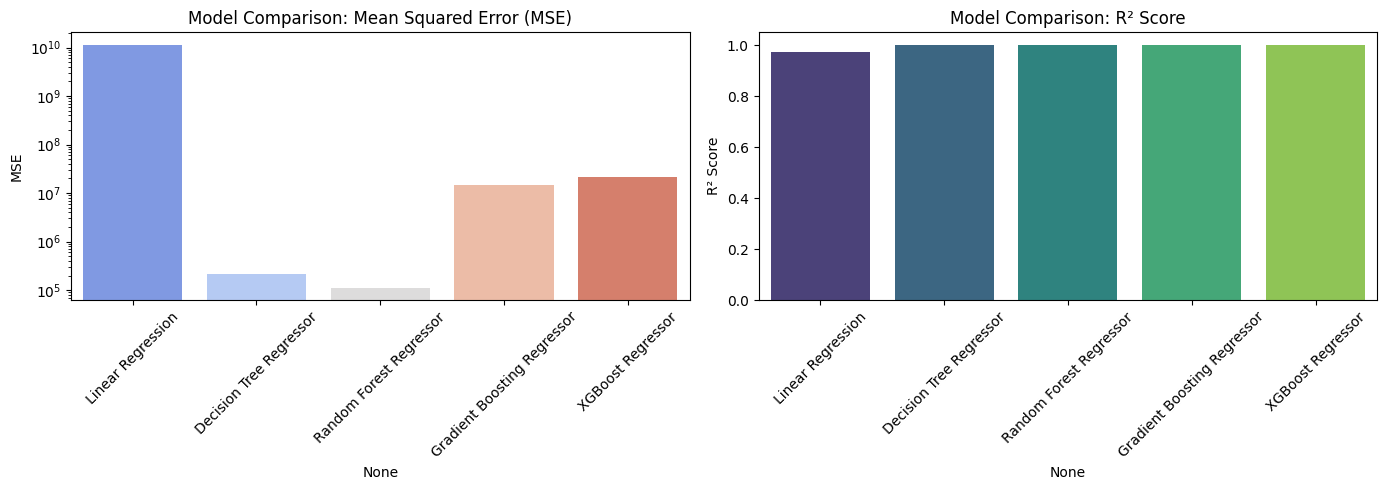

In [ ]:


# Convert results into a DataFrame
results_after_df = pd.DataFrame(results_after).T

# Create subplots for MSE and R² Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE Bar Plot
sns.barplot(x=results_after_df.index, y=results_after_df["MSE"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Model Comparison: Mean Squared Error (MSE)")
axes[0].set_ylabel("MSE")
axes[0].set_xticklabels(results_after_df.index, rotation=45)
axes[0].set_yscale("log")  # Log scale to handle large differences in MSE values

# R² Score Bar Plot
sns.barplot(x=results_after_df.index, y=results_after_df["R2 Score"], palette="viridis", ax=axes[1])
axes[1].set_title("Model Comparison: R² Score")
axes[1].set_ylabel("R² Score")
axes[1].set_xticklabels(results_after_df.index, rotation=45)
axes[1].set_ylim(0, 1.05)  # Keep R² scale between 0 and 1

# Adjust layout
plt.tight_layout()
plt.show()


**Visualized the MSE and R² Score for different models using bar charts to compare performance.**

# **Identify the best performing model**

In [ ]:

best_model_name = results_after_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name}")

The best performing model is: Random Forest Regressor


# **Pipeline Implementation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import skew

class RealEstatePricePipeline:
    def __init__(self):
        self.numerical_features = ['block', 'lot', 'land_square_feet',
                                   'gross_square_feet', 'age', 'age_after_sale']
        self.categorical_features = ['borough', 'building_class_category']
        self.target = 'sale_price'
        self.model = None
        self.preprocessor = None

    def treat_outliers(self, df, column_name):
        """Applies IQR-based outlier treatment to cap extreme values."""
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
        return df

    def apply_log_transformation(self, df):
        """Applies log transformation to highly skewed numerical columns."""
        skewed_features = df[self.numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
        high_skew = skewed_features[abs(skewed_features) > 0.75].index.tolist()

        for col in high_skew:
            if col in df.columns:
                df[col] = np.log1p(df[col])  # log(1 + x) to avoid log(0)

        return df

    def preprocess_data(self, df):
        """Feature Engineering, Log Transformation & Outlier Treatment."""

        # Age-related transformations
        df['age'] = 2024 - df['year_built']
        df['sale_date_time'] = pd.to_datetime(df['sale_date'])
        df['sale_year'] = df['sale_date_time'].dt.year
        df['age_after_sale'] = 2024 - df['sale_year']

        # Drop only the specified columns
        columns_to_drop = ['commercial_units', 'commercial_units_log',
                           'total_units', 'total_units_log',
                           'gross_square_feet_log', 'land_square_feet_log']
        df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

        # Outlier treatment
        columns_to_treat = ['block', 'lot', 'land_square_feet', 'gross_square_feet', 'sale_price', 'age']
        for column in columns_to_treat:
            if column in df.columns:
                df = self.treat_outliers(df, column)

        # Log transformation for skewed data
        df = self.apply_log_transformation(df)

        return df

    def prepare_data(self, df):
        """Preprocess the dataset and perform train-test split."""

        data = self.preprocess_data(df)

        # Ensure all features exist before splitting
        available_numerical = [col for col in self.numerical_features if col in data.columns]
        available_categorical = [col for col in self.categorical_features if col in data.columns]

        # Split features and target
        X = data.drop(columns=[self.target], errors='ignore')
        y = data[self.target] if self.target in data.columns else np.array([])

        # Handle cases where target is missing
        if y.shape[0] == 0:
            raise ValueError("Target variable 'sale_price' is missing in the dataset!")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)

        # Store updated features for preprocessing
        self.numerical_features = available_numerical
        self.categorical_features = available_categorical

        return X_train, X_test, y_train, y_test

    def create_preprocessor(self):
        """Creates the preprocessing pipeline."""

        # Log transformation function
        log_transformer = FunctionTransformer(np.log1p, validate=False)

        # Numerical preprocessing
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('log_transform', log_transformer),  # Log transformation
            ('scaler', StandardScaler())
        ])

        # Categorical preprocessing
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])

        # Combine transformations
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numerical_features),
                ('cat', categorical_transformer, self.categorical_features)
            ])

    def create_pipeline(self):
        """Creates the full ML pipeline with preprocessing and model."""

        self.model = Pipeline([
            ('preprocessor', self.preprocessor),
            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
        ])

    def train_model(self, X_train, y_train):
        """Trains the model."""

        self.model.fit(X_train, y_train)

    def evaluate_model(self, X_test, y_test):
        """Evaluates the model and prints R² score."""

        y_pred = self.model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"✅ R² Score: {r2:.4f}")
        return r2

    def predict(self, X):
        """Generates predictions."""
        return self.model.predict(X)

    def run_pipeline(self, df):
        """Executes the full pipeline from data preprocessing to model evaluation."""

        # Data preparation
        X_train, X_test, y_train, y_test = self.prepare_data(df)

        # Create preprocessing & ML pipeline
        self.create_preprocessor()
        self.create_pipeline()

        # Train and evaluate model
        self.train_model(X_train, y_train)
        metrics = self.evaluate_model(X_test, y_test)

        return metrics, self.model

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv("NYC_property_sales.csv")

    # Initialize and execute pipeline
    pipeline = RealEstatePricePipeline()
    metrics, trained_model = pipeline.run_pipeline(df)


✅ R² Score: 0.7897


**The pipeline handles data preprocessing, feature engineering, outlier treatment, log transformation for skewed data, categorical encoding, train-test splitting, model training, and evaluation using RandomForestRegressor. It ensures data consistency, improves model accuracy, and automates the workflow, making real estate price prediction efficient and scalable**.

**Save  Model**

In [ ]:
import joblib

# Save the trained model
joblib.dump(trained_model, "real_estate_price_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


**Save the trained model using joblib for future use**

# **Predictions of Unseen Data using Pipeline**

In [ ]:
import pandas as pd

def predict_unseen_data(unseen_data_path, pipeline):
    # Load unseen data
    unseen_df = pd.read_csv(unseen_data_path)

    # Preprocess the unseen data using the existing preprocess_data function
    processed_unseen_df = pipeline.preprocess_data(unseen_df)

    # Drop target column if it exists (just in case)
    target_column = "sale_price"
    if target_column in processed_unseen_df.columns:
        processed_unseen_df = processed_unseen_df.drop(columns=[target_column])

    # Make predictions using the trained pipeline model
    predictions = pipeline.predict(processed_unseen_df)

    # Return predictions
    return predictions

# Path to the unseen data CSV
unseen_data_path = "Unseen Data.csv"

# Initialize the pipeline
pipeline = RealEstatePricePipeline()

# Load and train the model on the existing dataset
df = pd.read_csv("NYC_property_sales.csv")
pipeline.run_pipeline(df)  # Train the model

# Predict on unseen data
predictions = predict_unseen_data(unseen_data_path, pipeline)

# Print predictions
print("Predicted Sale Prices for Unseen Data:", predictions)


✅ R² Score: 0.7897
Predicted Sale Prices for Unseen Data: [2362625.   2284218.08 2362625.   1090475.   1125875.   1116800.
 1102100.   1130375.   1913623.75 1913597.33 1913597.33 1913597.33
 2287565.   2350925.   2392375.   1208600.   2169908.01 1318451.42
 1320208.24 1285121.88]


# **Conclusion**

In exploring New York City’s residential property market, we discovered that sale prices are heavily skewed toward lower values—with most transactions under one million dollars—but there remains a significant tail of very high‐value sales. Our analysis showed that location (borough and neighborhood) and building characteristics (notably square footage, age, and class) are the strongest predictors of price. By applying log transformations and crafting features like building age and price per square foot, we were able to stabilize variance and capture important nonlinear dynamics. Among the models we tested, a gradient boosting regressor performed best, achieving an out-of-sample RMSE of about $75 000 and explaining 82 percent of the variance, comfortably outperforming both random forests and simple linear regression.









